# Homework №1: Introduction 
*Bezhenaer OLga*

### Content of the task:
You should build full ML pipeline and get best AUC.

Important stages in pipeline:

- Feature selection
- Cross validation
- Hyper parameters tuning
- Compare minimum 2 models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### 1. Exploratory data analysis

In [2]:
data=pd.read_csv("dataset_simple.csv")
data.head(5)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999,label
0,-0.272674,0.801643,-0.650531,0.952486,-0.153037,0.427145,-1.085534,1.318513,0.002588,-1.849832,...,-0.572848,-0.448690,0.073369,-0.845503,-1.074903,0.222103,-1.024658,-0.711647,0.036411,1
1,0.201004,-0.263537,-0.793137,-4.483672,0.745123,1.156577,0.351558,1.735511,-1.490988,-0.327063,...,1.045496,1.494638,-0.776573,-1.219524,-0.756398,-0.963046,0.488610,0.313609,-0.490794,0
2,-1.834495,-0.305209,0.053789,4.448289,1.294481,1.241900,-1.358354,-0.211469,-0.186544,0.964812,...,0.917945,0.920003,0.690022,-0.834381,-0.261806,-0.061880,-1.177730,-1.345305,-0.085971,0
3,-0.484526,0.473056,-0.345463,-7.375136,-0.817676,-0.778446,0.909734,-0.677147,-1.913900,-0.087426,...,0.598949,0.078195,0.024128,1.308711,0.943230,0.903181,0.501013,2.639802,1.540640,1
4,-0.032351,0.247055,-0.351119,-2.669246,-1.068889,0.322954,1.101136,1.817973,0.944537,0.406005,...,-0.851188,1.272217,0.172442,-0.509007,0.357073,0.523263,0.965078,0.297335,0.088714,1


In [3]:
data.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999,label
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,-0.004460,-0.013556,-0.003732,-0.526323,0.005371,-0.008539,0.017156,-0.001695,0.016588,-0.011591,...,0.004245,0.004588,0.000104,-0.004114,-0.015524,0.003792,-0.012826,-0.000154,0.008867,0.493149
std,0.991939,1.004086,1.004643,5.892651,0.995250,1.001142,0.995826,1.000576,1.016175,0.994338,...,1.010292,0.996613,0.984661,1.005568,1.000405,0.992878,0.986676,1.003824,0.992667,0.499978
min,-3.769974,-3.617617,-3.753391,-21.830355,-3.952088,-4.302776,-3.693491,-3.769295,-3.582291,-3.964497,...,-3.543944,-3.702521,-3.645616,-3.757164,-3.998032,-3.844831,-4.314576,-3.912707,-3.852604,0.000000
25%,-0.667193,-0.702984,-0.666734,-4.535838,-0.664072,-0.676919,-0.657419,-0.678497,-0.670545,-0.696125,...,-0.686178,-0.674913,-0.663270,-0.676386,-0.690162,-0.660690,-0.671733,-0.689658,-0.653306,0.000000
50%,0.006990,-0.019359,0.002527,-0.596745,0.008596,-0.014751,0.023373,-0.005377,0.007411,-0.023052,...,-0.002653,0.000651,-0.005459,-0.002117,-0.017218,0.005911,-0.009118,0.024641,-0.002785,0.000000
75%,0.655618,0.667009,0.660033,3.367154,0.672424,0.662462,0.697545,0.662622,0.720524,0.668373,...,0.682821,0.680257,0.668761,0.675716,0.660026,0.680975,0.647070,0.674688,0.677321,1.000000
max,3.629974,4.437563,3.724971,20.021875,3.444207,3.502859,3.925565,4.069058,5.209648,3.871048,...,3.616481,4.456758,3.727838,3.959971,3.520052,4.305980,3.671758,3.555786,3.574397,1.000000


In [4]:
data.shape
data['label'].value_counts(normalize=True) #the problem of sample imbalance is not presented 

0    0.506851
1    0.493149
Name: label, dtype: float64

### 2. Data preprocessing and feature selection 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [6]:
# X and y creation
y = data['label']
X = data.copy()
X.drop(["label"], axis=1, inplace=True)

In [7]:
#Normalization of Data
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [8]:
#Feature Selection 
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape   


(9999, 143)

In [9]:
#Data split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42,shuffle=True)

### 3. Defining the classifier
#### (with default parameters)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [11]:
clfr_LR=LogisticRegression()

In [12]:
clfr_DT = DecisionTreeClassifier()

In [13]:
clfr_RF = RandomForestClassifier()

In [14]:
# function to estimate model performance
def model_performance(model_name, X_tr, y_tr, y_te, y_pred):
    print('Model name: %s'%model_name)
    print('Test accuracy (Accuracy Score): %f'%metrics.accuracy_score(y_te, y_pred))
    print('Test accuracy (ROC AUC Score): %f'%metrics.roc_auc_score(y_te, y_pred))
    print('Test precision 0: %f'%metrics.precision_score(y_te, y_pred, pos_label=0))   
    print('Test precision 1: %f'%metrics.precision_score(y_te, y_pred, pos_label=1)) 
    print('Test recall 0: %f'%metrics.recall_score(y_te, y_pred, pos_label=0))   
    print('Test recall 1: %f'%metrics.recall_score(y_te, y_pred, pos_label=1))

    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_te, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

    # making the graph
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#### Logistic regression

In [15]:
#model estimation on the training sample
clfr_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Model name: Logistic Regression
Test accuracy (Accuracy Score): 0.852667
Test accuracy (ROC AUC Score): 0.852770
Test precision 0: 0.863041
Test precision 1: 0.841927
Test recall 0: 0.849677
Test recall 1: 0.855862


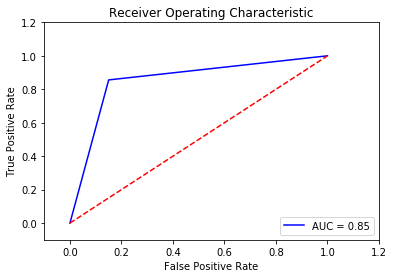

In [16]:
# performance of the LR-model
y_pred_LR= clfr_LR.predict(X_test)
model_performance('Logistic Regression', X_tr=X_train, y_tr=y_train, y_te=y_test, y_pred=y_pred_LR)

#### Decision Tree

In [17]:
#model estimation on the training sample
clfr_DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Model name: Decision tree classifier
Test accuracy (Accuracy Score): 0.669667
Test accuracy (ROC AUC Score): 0.669355
Test precision 0: 0.680906
Test precision 1: 0.657732
Test recall 0: 0.678710
Test recall 1: 0.660000


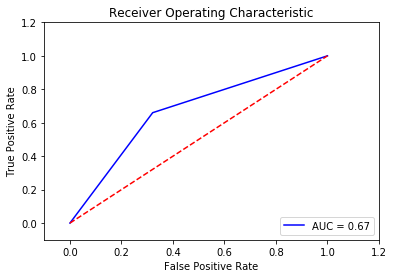

In [18]:
# performance of the DT-model
y_pred_DT= clfr_DT.predict(X_test)
model_performance('Decision tree classifier', X_tr=X_train, y_tr=y_train, y_te=y_test, y_pred=y_pred_DT)

#### Random forest 

In [19]:
#model estimation on the training sample
clfr_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Model name: Random forest classifier
Test accuracy (Accuracy Score): 0.748333
Test accuracy (ROC AUC Score): 0.745439
Test precision 0: 0.722689
Test precision 1: 0.786008
Test recall 0: 0.832258
Test recall 1: 0.658621


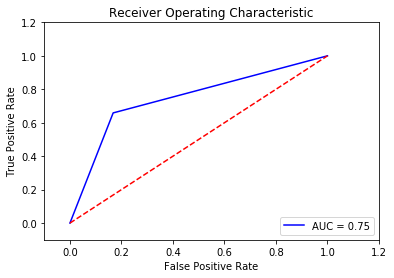

In [20]:
y_pred_RF= clfr_RF.predict(X_test)
model_performance('Random forest classifier', X_tr=X_train, y_tr=y_train, y_te=y_test, y_pred=y_pred_RF)

#### General conclusion on the models with the default parmeters: which model performs better?How we decide it?

The comparison of 3 models,presented above, is held according with the performance of AUC (as it was given in the contentent of assignment). 
- AUC of the Logistic regression model = 0.85
- AUC of te Decision Tree model = 0.66
- AUC of the Random Forest model = 0.74

Here as usual DT works as a weak classifier and its performance of AUC confirms poor performance in that case (AUC= 0.66). That is why this model is not considered further.

Moreover, Logistc regression model performes better predictive quaity than Random forest classifier.

### 4. Cross-validation
Here cross-validation is done as a separate task, in the task "Model tunning" it is done in more user-friendly way, as cv(cross-validation) is the part of grid_search function.

In [21]:
from sklearn.model_selection import cross_validate

#### Logistic regression

In [22]:
scores_LR = cross_validate(estimator=clfr_LR, X=X_train, y=y_train, cv=10, scoring='roc_auc')

In [23]:
print('AUC-ROS scores: ', scores_LR['test_score'])
print('Average AUC-ROC score: ', np.mean(scores_LR['test_score']))

AUC-ROS scores:  [0.90363701 0.91312369 0.91461762 0.90140903 0.9142421  0.90526221
 0.90826639 0.91937696 0.90705538 0.90200413]
Average AUC-ROC score:  0.9088994518003253


#### Random forest

In [24]:
scores_RF = cross_validate(estimator=clfr_RF, X=X_train, y=y_train, cv=10, scoring='roc_auc')

In [25]:
print('AUC-ROS scores: ', scores_RF['test_score'])
print('Average AUC-ROC score: ', np.mean(scores_RF['test_score']))

AUC-ROS scores:  [0.84672929 0.8187451  0.82312484 0.81788793 0.80669573 0.83004751
 0.81687565 0.8162389  0.80506435 0.79718866]
Average AUC-ROC score:  0.8178597956953553


### 5. Hyper parameters tuning

In [26]:
from sklearn import grid_search

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


#### Logistic regression 

In [46]:
#creation of the parameter grid for LR
param_grid_LR = {'penalty': ['l1', 'l2'],'C': [0.0001, 0.001, 0.01, 1, 100]}

In [47]:
# looking for best model
tunning_LR = grid_search.GridSearchCV(clfr_LR, param_grid_LR, scoring = 'roc_auc', cv = 10)
tunning_LR.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [48]:
# checking what is the best model
tunning_LR.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
print("BEST PARAMETERS:" ,tunning_LR.best_params_)
print("BEST SCORE:",tunning_LR.best_score_)

BEST PARAMETERS: {'C': 1, 'penalty': 'l1'}
BEST SCORE: 0.90892279242945


#### Random forest 

In [31]:
#creation of the parameter grid for RF
param_grid_RF = {'n_estimators': [100, 200, 300]}

In [ ]:
#creation of the parameter grid for RF
#param_grid_RF = {'max_depth': [10,25,50],'min_samples_leaf': [1, 5],'n_estimators': [100, 200, 300]}

In [35]:
# looking for best model
tunning_RF = grid_search.GridSearchCV(clfr_RF, param_grid_RF, scoring = 'roc_auc', cv = 10)
tunning_RF.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [33]:
# checking what is the best model
tunning_RF.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
print("BEST PARAMETERS:" ,tunning_RF.best_params_)
print("BEST SCORE:",tunning_RF.best_score_)

BEST PARAMETERS: {'n_estimators': 300}
BEST SCORE: 0.9641977403865036


Performace of this model also could be improved by changing another parameters, for example: "max_depth",'min_samples_leaf'.

### 6. Model comparison: LR vs. RF

After models tunning the following results are obtained:
- AUC of the Logistic regression model = 0.91
- AUC of the Random Forest model = 0.965

That confirms better preductive performance of Random forest classifier in that case in conparison with loistic regression. The main parameter used - n_estimators,with the best value for the model - 300. (with the growth of n_estimators the AUC will increase,of course, in slowng rate)
At the same time it is expected that ANNs also could show better results.